In [1]:
#載入套件
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#匯入資料（但所有變數名稱皆是隱藏，但需要預測最後TARGET CLASS是哪個）
#index_col=0代表設定第一行為index
df = pd.read_csv('data/Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
#由於KNN分類法是藉由確認最近的觀察值來預測分類，因此變數的比例就會影響很大
#載入標準化比例尺(StandardScaler)套件，只將所有`特徵值`做標準化
from sklearn.preprocessing import StandardScaler
df = df.drop('TARGET CLASS', axis=1)  #移除目標類別
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  #標準化特徵值
#將標準化後的特徵值轉換為DataFrame格式
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
#將標準化後的特徵值與目標類別合併
df_scaled['TARGET CLASS'] = pd.read_csv('data/Classified Data', index_col=0)['TARGET CLASS']
#檢視標準化後的資料
df_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314,1
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759,0
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850,0
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987,1
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510,1


In [8]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled.drop('TARGET CLASS', axis=1),  #特徵值
    df_scaled['TARGET CLASS'],  #目標類別
    test_size=0.3,  #測試組佔30%
    random_state=42  #隨機種子
)

In [12]:
#使用KNN演算法
from sklearn.neighbors import KNeighborsClassifier

#從k=1開始測試
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
#測試KNN演算法的好壞
from sklearn.metrics import classification_report,confusion_matrix
#使用最佳的k值（假設是k=5）來預測
pred = knn.predict(X_test)
#輸出分類報告
print(confusion_matrix(y_test,pred))

[[134   8]
 [ 11 147]]


In [14]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [15]:
#剛剛只先用了k=1來建立模型，現在利用for來建立迴圈(選擇不同k值)，並紀錄錯誤率
error_rate = []
for k in range(1, 61):
    #建立KNN分類器
    knn = KNeighborsClassifier(n_neighbors=k)
    #訓練模型
    knn.fit(X_train, y_train)
    #計算準確率
    accuracy = knn.score(X_test, y_test)
    #紀錄錯誤率
    error_rate.append(1 - accuracy)
    print(f'k={k}, Accuracy: {accuracy:.4f}')
    print(f'k={k}, Error Rate: {1 - accuracy:.4f}')


k=1, Accuracy: 0.9367
k=1, Error Rate: 0.0633
k=2, Accuracy: 0.9167
k=2, Error Rate: 0.0833
k=3, Accuracy: 0.9433
k=3, Error Rate: 0.0567
k=4, Accuracy: 0.9433
k=4, Error Rate: 0.0567
k=5, Accuracy: 0.9433
k=5, Error Rate: 0.0567
k=6, Accuracy: 0.9433
k=6, Error Rate: 0.0567
k=7, Accuracy: 0.9367
k=7, Error Rate: 0.0633
k=8, Accuracy: 0.9433
k=8, Error Rate: 0.0567
k=9, Accuracy: 0.9433
k=9, Error Rate: 0.0567
k=10, Accuracy: 0.9500
k=10, Error Rate: 0.0500
k=11, Accuracy: 0.9500
k=11, Error Rate: 0.0500
k=12, Accuracy: 0.9533
k=12, Error Rate: 0.0467
k=13, Accuracy: 0.9533
k=13, Error Rate: 0.0467
k=14, Accuracy: 0.9533
k=14, Error Rate: 0.0467
k=15, Accuracy: 0.9533
k=15, Error Rate: 0.0467
k=16, Accuracy: 0.9533
k=16, Error Rate: 0.0467
k=17, Accuracy: 0.9533
k=17, Error Rate: 0.0467
k=18, Accuracy: 0.9500
k=18, Error Rate: 0.0500
k=19, Accuracy: 0.9467
k=19, Error Rate: 0.0533
k=20, Accuracy: 0.9467
k=20, Error Rate: 0.0533
k=21, Accuracy: 0.9500
k=21, Error Rate: 0.0500
k=22, Accu

Text(0, 0.5, 'Error Rate')

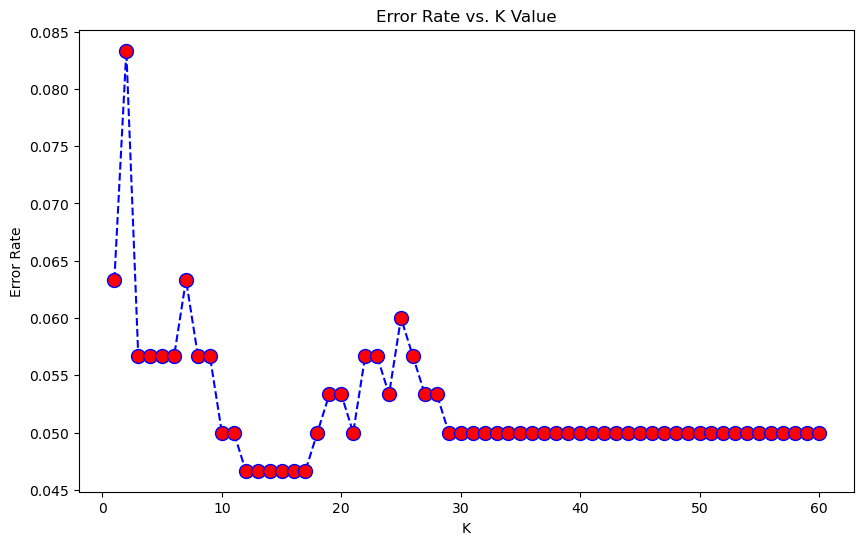

In [17]:
#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5-6%之間震盪。
plt.figure(figsize=(10,6))
plt.plot(range(1,61),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
#跟一開始k=1做比較
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH k=1


[[134   8]
 [ 11 147]]


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [19]:
#選擇錯誤率最低的K=?????來看precision、recall、f1-score、support表現
k = 23  # 假設選擇k=23
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(f'WITH k={k}')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
precision = classification_report(y_test, pred, output_dict=True)['macro avg']['precision']
recall = classification_report(y_test, pred, output_dict=True)['macro avg']['recall']
f1_score = classification_report(y_test, pred, output_dict=True)['macro avg']['f1-score']
support = classification_report(y_test, pred, output_dict=True)['macro avg']['support']
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Support: {support:.4f}')

WITH k=23


[[135   7]
 [ 10 148]]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       142
           1       0.95      0.94      0.95       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

Precision: 0.9429
Recall: 0.9437
F1 Score: 0.9432
Support: 300.0000
